In [1]:
import pickle
import pandas as pd


In [2]:
tickers = ['btc', 'eth', 'xrp', 'usdt', 'ltc', 'xlm', 'xem', 'xmr', 'dash', 'dcr', 'zec', 'etc', 'waves', 'dgb', 'sc']

temp_dir = {'SYMBOL' : [],
            'INDUSTRIES' : [],
            'RETURN' : [],
            'MARKET RETURN': [],
            'SCORE' : []}


for ticker in tickers:
    with open(f'score/{ticker.upper()}-USD.pkl', 'rb') as f:
        rank = pickle.load(f)
        df = pd.read_csv(f'../data/{ticker.upper()}-USD.csv')['stock_price']
        ret = ((df.iloc[-1] - df.iloc[0])/df.iloc[0]) * 100
        
        temp_dir['SYMBOL'].append(rank[0])
        temp_dir['INDUSTRIES'].append(rank[1])
        temp_dir['RETURN'].append(rank[3])
        temp_dir['MARKET RETURN'].append(ret)
        temp_dir['SCORE'].append(rank[2])

            
ranking = pd.DataFrame(temp_dir)
ranking = ranking.sort_values('SCORE', ascending=False)
ranking['RANK'] = [i for i in range(1, len(ranking) + 1)]
ranking.set_index('RANK', inplace=True)
ranking

,SYMBOL,INDUSTRIES,RETURN,MARKET RETURN,SCORE
RANK,,,,,
1,ZEC-USD,Cryptocurrentcy,40.925607,-12.922420,1162.110381
2,XEM-USD,Cryptocurrentcy,24.220897,-25.210046,93.470561
3,BTC-USD,Cryptocurrentcy,13.408769,0.328712,51.911019
4,WAVES-USD,Cryptocurrentcy,14.203926,-11.651053,47.931746
5,LTC-USD,Cryptocurrentcy,9.433475,-14.508253,27.504288
6,ETH-USD,Cryptocurrentcy,5.551542,-9.002396,17.497823
7,DCR-USD,Cryptocurrentcy,5.860282,5.267617,3.939793
8,XLM-USD,Cryptocurrentcy,-2.415573,-12.792851,3.473953
9,ETC-USD,Cryptocurrentcy,-14.045685,-18.721677,-0.584516


<AxesSubplot:xlabel='RANK'>

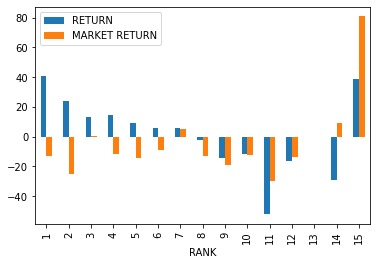

In [3]:
ranking.drop('SCORE', axis=1).plot.bar()


<AxesSubplot:xlabel='SYMBOL'>

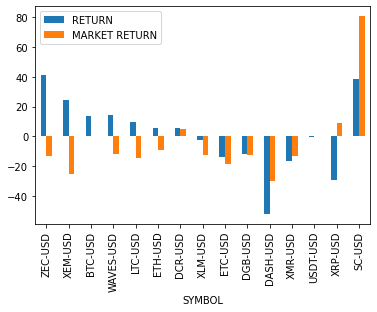

In [4]:
ranking.groupby('SYMBOL').mean().sort_values(by='SCORE', ascending=False).drop('SCORE', axis=1).plot.bar()